In [3]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from umap import UMAP

In [7]:
data = pd.read_csv('C:/Users/Dylan/exoplanet_unsupervised/Data/cleaned_processed_data/cleaned_exoplanets_copy.csv', header = 0)
#loading this dataset

In [8]:
#between the previous step and the next one, I filled in the blank cells by estimating the values for each planet 

In [9]:
data.shape

(5470, 10)

In [10]:
data.isnull().sum()

pl_name         0
pl_orbper       4
pl_orbsmax      7
pl_radj        17
pl_bmassj      25
pl_dens        36
st_rad        229
st_mass         3
st_lum        224
pl_class        6
dtype: int64

In [284]:
dropped_column = data['pl_class'] #saving this column so I can add it later

In [285]:
data = data.drop(['st_rad', 'st_lum'], axis=1)

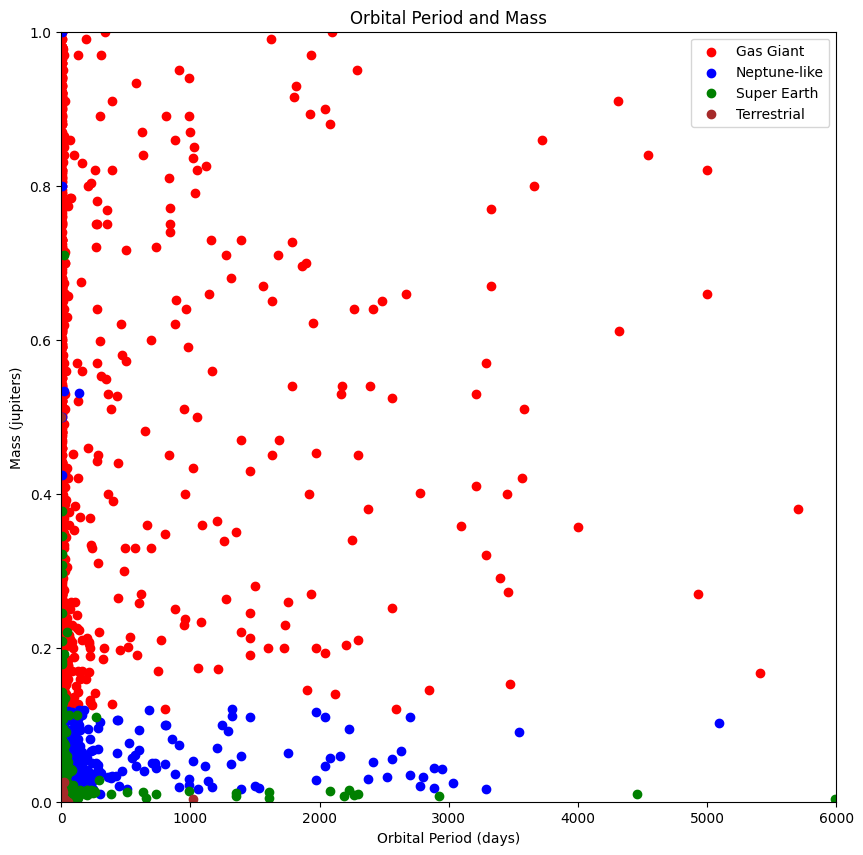

In [292]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Define a list of colors for each class
class_colors = {'Gas Giant': 'red', 'Neptune-like': 'blue', 'Super Earth': 'green', 'Terrestrial': 'brown'}

for class_, color in class_colors.items():
    subset = data[data['pl_class'] == class_]
    plt.scatter(subset['pl_orbper'], subset['pl_bmassj'], label=class_, color=color)

plt.xlabel('Orbital Period (days)')
plt.ylabel('Mass (jupiters)')
plt.title('Orbital Period and Mass')
plt.xlim(0, 6000)  # Example x-axis range
plt.ylim(0, 1) 
plt.legend()
plt.show()

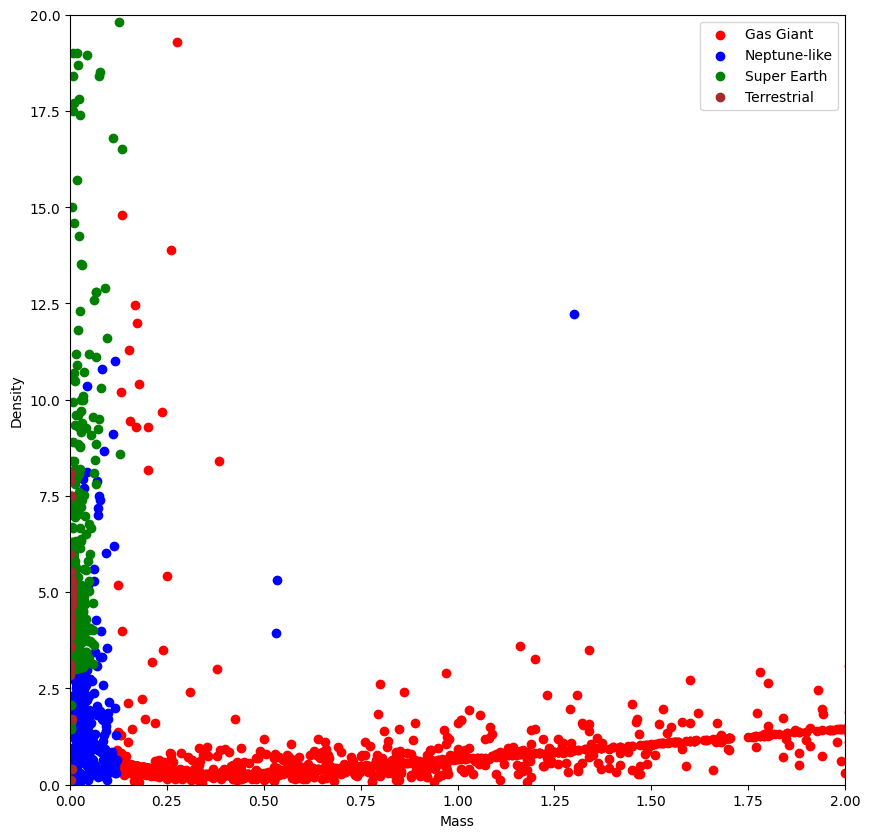

In [287]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Define a list of colors for each class
class_colors = {'Gas Giant': 'red', 'Neptune-like': 'blue', 'Super Earth': 'green', 'Terrestrial': 'brown'}

for class_, color in class_colors.items():
    subset = data[data['pl_class'] == class_]
    plt.scatter(subset['pl_bmassj'], subset['pl_dens'], label=class_, color=color)

plt.xlabel('Mass')
plt.ylabel('Density')
plt.title('')
plt.xlim(0, 2)  # Example x-axis range
plt.ylim(0, 20) 
plt.legend()
plt.show()

In [ ]:
#there is a pretty decent correlation. The planets with higher mass are less dense. Whereas the planets with a lower mass are more dense. 

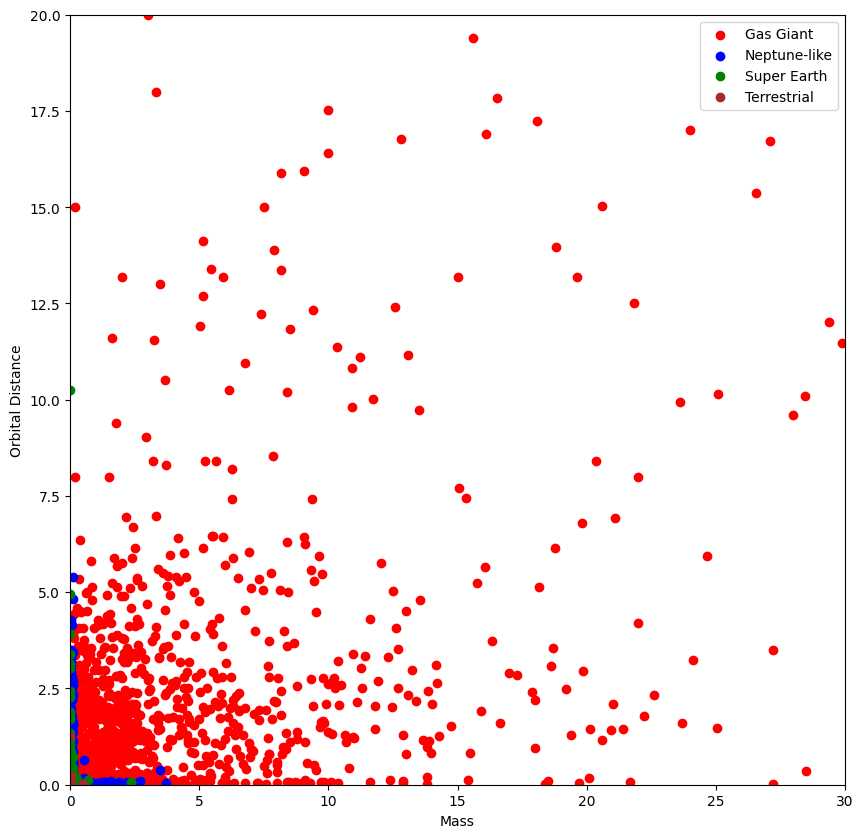

In [294]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Define a list of colors for each class
class_colors = {'Gas Giant': 'red', 'Neptune-like': 'blue', 'Super Earth': 'green', 'Terrestrial': 'brown'}

for class_, color in class_colors.items():
    subset = data[data['pl_class'] == class_]
    plt.scatter(subset['pl_bmassj'], subset['pl_orbsmax'], label=class_, color=color)

plt.xlabel('Mass')
plt.ylabel('Orbital Distance')
plt.title('')
plt.xlim(0,30)  # Example x-axis range
plt.ylim(0, 20) 
plt.legend()
plt.show()

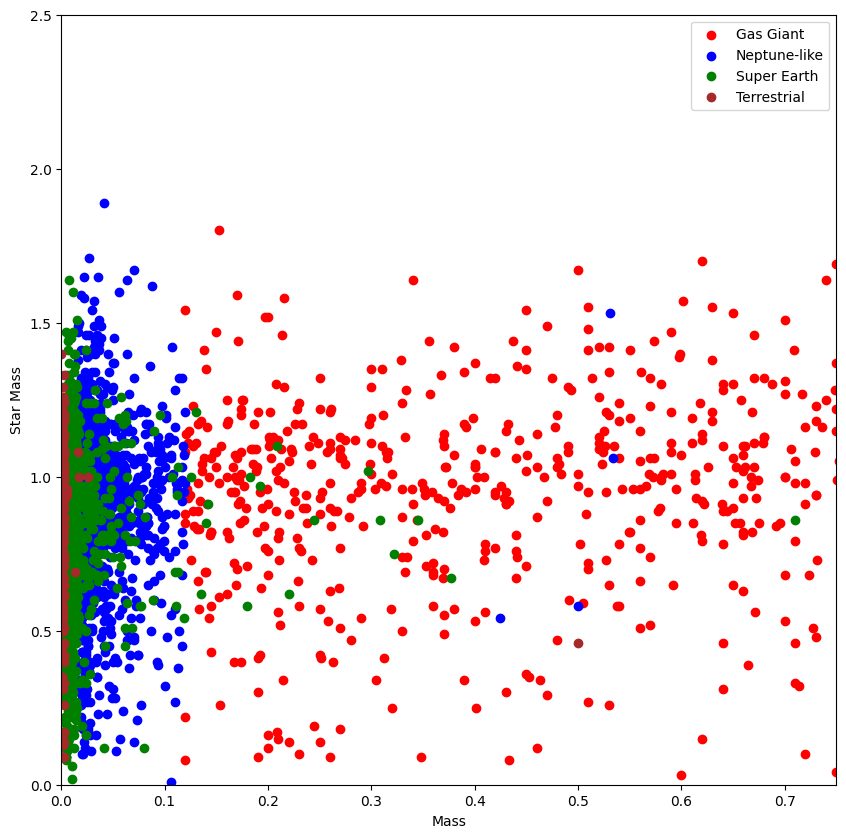

In [289]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Define a list of colors for each class
class_colors = {'Gas Giant': 'red', 'Neptune-like': 'blue', 'Super Earth': 'green', 'Terrestrial': 'brown'}

for class_, color in class_colors.items():
    subset = data[data['pl_class'] == class_]
    plt.scatter(subset['pl_bmassj'], subset['st_mass'], label=class_, color=color)

plt.xlabel('Mass')
plt.ylabel('Star Mass')
plt.title('')
plt.xlim(0, 0.75)  # Example x-axis range
plt.ylim(0, 2.5) 
plt.legend()
plt.show()

In [ ]:
#Planets with a higher mass do not necessarily have a larger star masss

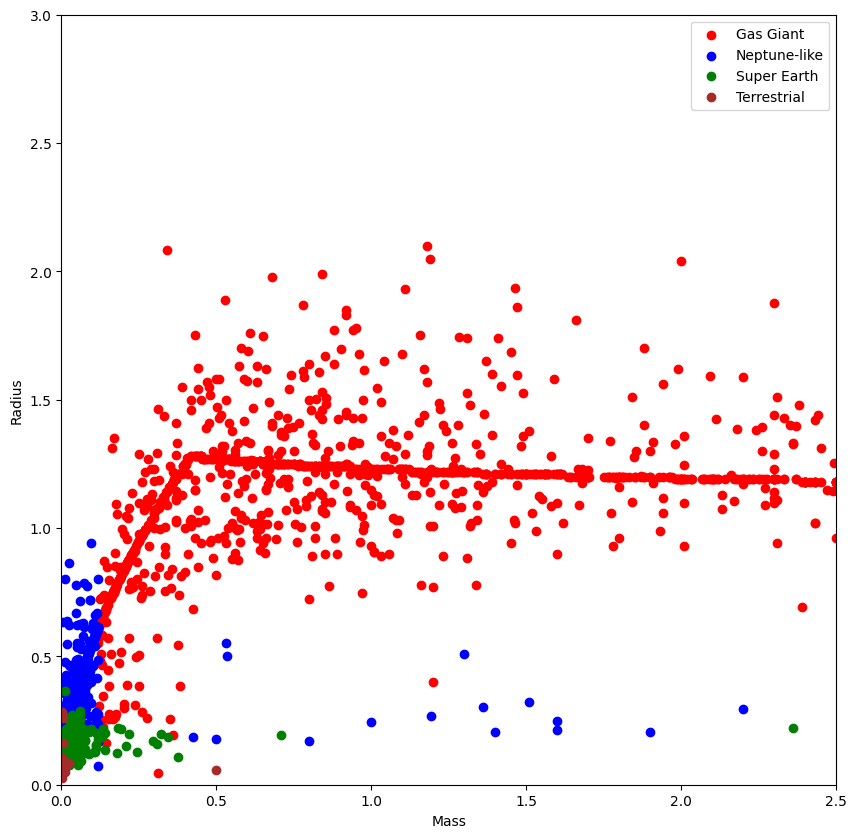

In [290]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Define a list of colors for each class
class_colors = {'Gas Giant': 'red', 'Neptune-like': 'blue', 'Super Earth': 'green', 'Terrestrial': 'brown'}

for class_, color in class_colors.items():
    subset = data[data['pl_class'] == class_]
    plt.scatter(subset['pl_bmassj'], subset['pl_radj'], label=class_, color=color)

plt.xlabel('Mass')
plt.ylabel('Radius')
plt.title('')
plt.ylim(0, 3)  # Example x-axis range
plt.xlim(0, 2.5) 
plt.legend()
plt.show()

In [ ]:
data = data.drop(['pl_orbsmax','pl_class','st_mass', 'pl_radj'], axis=1)

In [369]:
data.isnull().sum()

pl_name       0
pl_orbper     4
pl_bmassj    25
pl_dens      36
dtype: int64

In [370]:
data = data.dropna(inplace=False)
#dropping the rows with null values as those are the planets we simply do not have enough data on

In [371]:
print(data.shape)
data.isnull().sum()
#no null values!

(5432, 4)


pl_name      0
pl_orbper    0
pl_bmassj    0
pl_dens      0
dtype: int64

In [372]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['pl_orbper','pl_bmassj','pl_dens']] = scaler.fit_transform(data[['pl_orbper','pl_bmassj','pl_dens']])

In [373]:
data

pl_name     pl_orbper     pl_bmassj   pl_dens
0                          11 Com b  8.107943e-07  2.579779e-02  0.004473
1                          11 UMi b  1.283904e-06  1.960099e-02  0.003230
2                          14 And b  4.620629e-07  6.382899e-03  0.000908
3                          14 Her b  4.390418e-06  1.070870e-02  0.001642
4                        16 Cyg B b  1.986093e-06  2.366942e-03  0.000289
5                          17 Sco b  1.438531e-06  5.744602e-03  0.000816
6                          18 Del b  2.470670e-06  1.369673e-02  0.002153
7           1RXS J160929.1-210524 b  5.911144e-03  1.063822e-02  0.000589
8                          24 Boo b  7.527337e-08  1.210027e-03  0.000132
9                          24 Sex b  1.126143e-06  2.646197e-03  0.000331
10                         24 Sex c  2.196292e-06  1.143537e-03  0.000124
11                         2M0437 b  2.826235e-03  5.319070e-03  0.000739
12     2MASS J01033563-5515561 AB b  1.605646e-03  1.728716e-02  0.002855
13        2MASS J01225093-2439505 b  5.389707e-04  3.257971e-02  0.007124
14        2MASS J02192210-3925225 b  5.340736e-03  1.848396e-02  0.001346
15        2MASS J04414489+2301513 b  3.734276e-04  9.973325e-03  0.001529
16        2MASS J12073346-3932539 b  2.622077e-03  6.648857e-03  0.000948
17        2MASS J19383260+4603591 b  1.009725e-06  2.526516e-03  0.000317
18        2MASS J22362452+4751425 b  4.093798e-03  1.662226e-02  0.002738
19                       30 Ari B b  8.333565e-07  1.837758e-02  0.003042
20                          4 UMa b  6.696749e-07  9.441410e-03  0.001412
21                         42 Dra b  1.191565e-06  5.159495e-03  0.000715
22                         47 UMa b  2.681366e-06  3.364282e-03  0.000443
23                         47 UMa c  5.947536e-06  7.180054e-04  0.000070
24                         47 UMa d  3.483062e-05  2.180771e-03  0.000265
25                         51 Eri b  2.907440e-05  2.659495e-03  0.000333
26                         51 Peg b  1.029870e-08  6.116224e-04  0.000057
27                         55 Cnc b  3.622113e-08  1.104442e-03  0.000120
28                         55 Cnc c  1.102194e-07  2.278458e-04  0.000107
29                         55 Cnc d  1.386594e-05  5.156836e-03  0.000715
30                         55 Cnc e  1.606570e-09  3.335107e-05  0.001555
31                         55 Cnc f  6.462420e-07  1.874202e-04  0.000125
32                          6 Lyn b  2.323904e-06  2.672793e-03  0.000335
33                         61 Vir b  1.025944e-08  2.119681e-05  0.000692
34                         61 Vir c  9.435396e-08  7.571809e-05  0.000258
35                         61 Vir d  3.057694e-07  9.566490e-05  0.000214
36                          7 CMa b  1.828381e-06  2.460027e-03  0.000307
37                          7 CMa c  2.477386e-06  1.156835e-03  0.000126
38                         70 Vir b  2.900430e-07  9.960027e-03  0.001527
39                         75 Cet b  1.720919e-06  3.989282e-03  0.000540
40                          8 UMi b  2.321127e-07  1.741942e-03  0.000206
41                         81 Cet b  2.369675e-06  7.047793e-03  0.001027
42                         91 Aqr b  4.510181e-07  4.255240e-03  0.000577
43                         AB Aur b  5.339735e-04  1.196801e-02  0.001881
44                         AB Pic b  4.017477e-03  1.795205e-02  0.002972
45                         AF Lep b  1.997490e-05  4.255240e-03  0.000577
46                         AU Mic b  2.082660e-08  8.409575e-05  0.000303
47                         AU Mic c  4.668728e-08  4.007979e-05  0.000279
48                     BD+03 2562 b  1.198531e-06  8.510559e-03  0.001274
49                     BD+14 4559 b  6.687793e-07  1.382899e-03  0.000155
50                     BD+15 2375 b  3.809186e-07  1.410825e-03  0.000158
51                     BD+15 2940 b  3.417644e-07  1.475984e-03  0.000170
52                     BD+20 2457 b  9.441276e-07  2.848397e-02  0.004943
53                     BD+20 245

In [374]:
from sklearn.utils import shuffle

# Shuffle the dataset
data = shuffle(data, random_state=42)

In [375]:
column_to_omit = 'pl_name'

# Drop the specified column while keeping the DataFrame structure
data_without_column = data.drop(columns=[column_to_omit])

# Initialize UMAP with desired parameters
umap = UMAP(n_components=2, random_state=42)

# Apply UMAP dimensionality reduction
umap_result = umap.fit_transform(data_without_column)

# Create a new DataFrame with UMAP results and the original index
umap_df = pd.DataFrame(umap_result, columns=['UMAP Dimension 1', 'UMAP Dimension 2'], index=data.index)

In [376]:
from sklearn.cluster import KMeans
#initialize k-means clustering

K = 3

kmeans = KMeans(n_clusters=K, n_init = 10000)
kmeans.fit(umap_df)

cluster_assignments = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

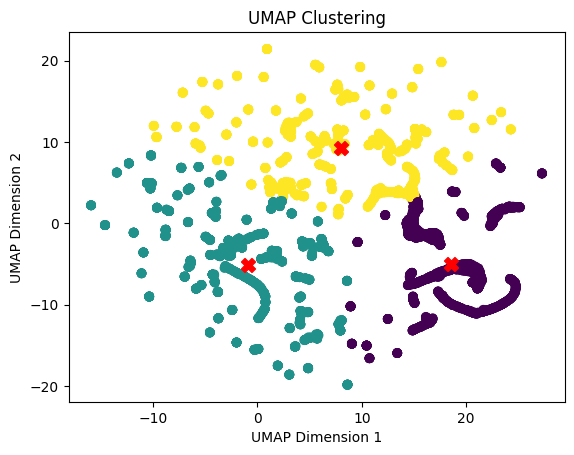

In [377]:
data['cluster_label'] = cluster_assignments
#visualize the clustering

plt.scatter(umap_df['UMAP Dimension 1'], umap_df['UMAP Dimension 2'], c=cluster_assignments, cmap='viridis')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='X', color='red', s=100)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Clustering')
plt.show()

In [378]:
unique_labels, label_counts = np.unique(cluster_assignments, return_counts=True)

# count the number of planets per column
for label, count in zip(unique_labels, label_counts):
    print(f"Cluster {label}: {count} data points")

Cluster 0: 1785 data points
Cluster 1: 1692 data points
Cluster 2: 1955 data points


In [379]:
data['Class'] = dropped_column #remember that column I saved? I add the classes now

In [380]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Actual_Labels_Encoded'] = label_encoder.fit_transform(data['Class'])

actual_labels_encoded = data['Actual_Labels_Encoded']
cluster_labels = data['cluster_label']

In [381]:
data

pl_name     pl_orbper     pl_bmassj   pl_dens  \
5292                     WASP-177 b  7.415462e-09  6.754522e-04  0.000033   
4982                     TOI-1694 c  9.679336e-07  1.396197e-03  0.000157   
2159                  Kepler-1166 b  8.246264e-08  1.454787e-05  0.000927   
501                     HD 108341 b  2.808232e-06  2.991942e-03  0.000385   
4490                   Kepler-858 b  1.891674e-07  8.821809e-05  0.000228   
4140                     Kepler-6 b  7.820879e-09  8.882182e-04  0.000087   
1286                      HR 8799 d  9.203958e-05  1.329779e-02  0.001752   
5009                     TOI-2000 c  2.247848e-08  3.416756e-04  0.000187   
5066                     TOI-2589 b  1.530771e-07  4.654176e-03  0.000802   
240                       GJ 3929 b  6.282410e-09  7.247341e-06  0.001705   
1789                     KELT-4 A b  7.211161e-09  1.199388e-03  0.000046   
1350                       K2-148 d  2.404775e-08  1.388298e-05  0.000966   
4864                  OGLE2-TR-L9 b  5.957282e-09  5.983963e-03  0.000286   
381                       HAT-P-9 b  9.532598e-09  9.959309e-04  0.000073   
2427                  Kepler-1368 b  1.455083e-09  1.401596e-05  0.000957   
2370                  Kepler-1322 c  1.584396e-08  2.199468e-05  0.000673   
3077                  Kepler-1858 b  2.188579e-07  2.691490e-05  0.000577   
351                      HAT-P-44 b  1.047391e-08  4.680054e-04  0.000047   
2429                   Kepler-137 b  2.076040e-08  1.147606e-05  0.001112   
4806          OGLE-2016-BLG-1195L b  3.997536e-06  5.904256e-06  0.001342   
4387                   Kepler-787 b  2.083593e-09  9.055852e-06  0.001332   
491                     HD 106906 b  1.230093e-02  1.462758e-02  0.002362   
553                     HD 120084 b  5.186591e-06  7.662155e-03  0.001119   
4221                   Kepler-653 c  2.014105e-09  1.595745e-06  0.001077   
4711            MOA-2011-BLG-028L b  8.813033e-06  1.196011e-04  0.000173   
3286                   Kepler-204 c  6.360668e-08  1.601064e-05  0.000861   
4796          OGLE-2015-BLG-0954L b  3.361516e-06  4.521197e-03  0.000624   
33                         61 Vir b  1.025944e-08  2.119681e-05  0.000692   
84                       CoRoT-11 b  7.222945e-09  3.098325e-03  0.000225   
4527                   Kepler-888 b  1.756398e-07  1.561170e-05  0.000880   
3825                   Kepler-397 b  5.512498e-08  2.757979e-05  0.000565   
2823                  Kepler-1664 b  3.556242e-08  3.941490e-05  0.000429   
715                     HD 167042 b  1.046466e-06  2.260559e-03  0.000277   
4654                   Kepler-987 b  2.617229e-07  4.460107e-05  0.000392   
4243                   Kepler-672 b  9.524069e-08  2.837766e-05  0.000554   
279                        GJ 685 b  5.987386e-08  3.757979e-05  0.000446   
3424                   Kepler-251 c  4.085407e-08  3.382979e-05  0.000483   
4084                   Kepler-559 b  4.352442e-08  5.297873e-05  0.000340   
4295                   Kepler-716 c  9.649959e-09  1.046543e-05  0.001194   
1236                     HIP 5158 b  8.597744e-07  1.888218e-03  0.000224   
248                      GJ 414 A c  1.865023e-06  2.251463e-04  0.000110   
4446                   Kepler-825 b  9.161429e-09  1.228724e-05  0.001058   
1191                     HD 95872 b  1.088286e-05  4.973325e-03  0.000690   
2072                  Kepler-1100 b  1.574949e-08  1.547872e-05  0.000884   
4270                   Kepler-693 b  3.802221e-08  3.084309e-04  0.000083   
2953                  Kepler-1760 b  9.511292e-08  2.438830e-05  0.000622   
373                      HAT-P-65 b  6.255594e-09  7.007181e-04  0.000015   
4776          OGLE-2012-BLG-0026L c  9.267312e-06  1.143537e-03  0.000122   
4255                   Kepler-680 b  8.953284e-09  2.691490e-05  0.000579   
167                EPIC 229004835 b  3.992643e-08  4.343085e-05  0.001046   
3550                   Kepler-295 c  5.332227e-08  7.061171e-06  0.001370   
3448                   K

In [385]:
dictionary = {0: '0', 1: '2', 2: '1'} #dictionary to transfer the classes as they are encoded differently 
data['new_mapped_label'] = data['cluster_label'].map(dictionary) #integrate the dictionary 

In [386]:
print(data.dtypes) #check data types

pl_name                   object
pl_orbper                float64
pl_bmassj                float64
pl_dens                  float64
cluster_label              int32
Class                     object
Actual_Labels_Encoded      int32
new_mapped_label          object
dtype: object


In [389]:
data

pl_name     pl_orbper     pl_bmassj   pl_dens  \
5292                     WASP-177 b  7.415462e-09  6.754522e-04  0.000033   
4982                     TOI-1694 c  9.679336e-07  1.396197e-03  0.000157   
2159                  Kepler-1166 b  8.246264e-08  1.454787e-05  0.000927   
501                     HD 108341 b  2.808232e-06  2.991942e-03  0.000385   
4490                   Kepler-858 b  1.891674e-07  8.821809e-05  0.000228   
4140                     Kepler-6 b  7.820879e-09  8.882182e-04  0.000087   
1286                      HR 8799 d  9.203958e-05  1.329779e-02  0.001752   
5009                     TOI-2000 c  2.247848e-08  3.416756e-04  0.000187   
5066                     TOI-2589 b  1.530771e-07  4.654176e-03  0.000802   
240                       GJ 3929 b  6.282410e-09  7.247341e-06  0.001705   
1789                     KELT-4 A b  7.211161e-09  1.199388e-03  0.000046   
1350                       K2-148 d  2.404775e-08  1.388298e-05  0.000966   
4864                  OGLE2-TR-L9 b  5.957282e-09  5.983963e-03  0.000286   
381                       HAT-P-9 b  9.532598e-09  9.959309e-04  0.000073   
2427                  Kepler-1368 b  1.455083e-09  1.401596e-05  0.000957   
2370                  Kepler-1322 c  1.584396e-08  2.199468e-05  0.000673   
3077                  Kepler-1858 b  2.188579e-07  2.691490e-05  0.000577   
351                      HAT-P-44 b  1.047391e-08  4.680054e-04  0.000047   
2429                   Kepler-137 b  2.076040e-08  1.147606e-05  0.001112   
4806          OGLE-2016-BLG-1195L b  3.997536e-06  5.904256e-06  0.001342   
4387                   Kepler-787 b  2.083593e-09  9.055852e-06  0.001332   
491                     HD 106906 b  1.230093e-02  1.462758e-02  0.002362   
553                     HD 120084 b  5.186591e-06  7.662155e-03  0.001119   
4221                   Kepler-653 c  2.014105e-09  1.595745e-06  0.001077   
4711            MOA-2011-BLG-028L b  8.813033e-06  1.196011e-04  0.000173   
3286                   Kepler-204 c  6.360668e-08  1.601064e-05  0.000861   
4796          OGLE-2015-BLG-0954L b  3.361516e-06  4.521197e-03  0.000624   
33                         61 Vir b  1.025944e-08  2.119681e-05  0.000692   
84                       CoRoT-11 b  7.222945e-09  3.098325e-03  0.000225   
4527                   Kepler-888 b  1.756398e-07  1.561170e-05  0.000880   
3825                   Kepler-397 b  5.512498e-08  2.757979e-05  0.000565   
2823                  Kepler-1664 b  3.556242e-08  3.941490e-05  0.000429   
715                     HD 167042 b  1.046466e-06  2.260559e-03  0.000277   
4654                   Kepler-987 b  2.617229e-07  4.460107e-05  0.000392   
4243                   Kepler-672 b  9.524069e-08  2.837766e-05  0.000554   
279                        GJ 685 b  5.987386e-08  3.757979e-05  0.000446   
3424                   Kepler-251 c  4.085407e-08  3.382979e-05  0.000483   
4084                   Kepler-559 b  4.352442e-08  5.297873e-05  0.000340   
4295                   Kepler-716 c  9.649959e-09  1.046543e-05  0.001194   
1236                     HIP 5158 b  8.597744e-07  1.888218e-03  0.000224   
248                      GJ 414 A c  1.865023e-06  2.251463e-04  0.000110   
4446                   Kepler-825 b  9.161429e-09  1.228724e-05  0.001058   
1191                     HD 95872 b  1.088286e-05  4.973325e-03  0.000690   
2072                  Kepler-1100 b  1.574949e-08  1.547872e-05  0.000884   
4270                   Kepler-693 b  3.802221e-08  3.084309e-04  0.000083   
2953                  Kepler-1760 b  9.511292e-08  2.438830e-05  0.000622   
373                      HAT-P-65 b  6.255594e-09  7.007181e-04  0.000015   
4776          OGLE-2012-BLG-0026L c  9.267312e-06  1.143537e-03  0.000122   
4255                   Kepler-680 b  8.953284e-09  2.691490e-05  0.000579   
167                EPIC 229004835 b  3.992643e-08  4.343085e-05  0.001046   
3550                   Kepler-295 c  5.332227e-08  7.061171e-06  0.001370   
3448                   K

In [390]:
matches = 0
data['new_mapped_label'] = data['new_mapped_label'].astype('int32') #the new column has a different datatype which would mess up label comparison so we change its data type

# Loop through the DataFrame and compare values
for index, row in data.iterrows():
    encoded_value_1 = row['Actual_Labels_Encoded']
    encoded_value_2 = row['new_mapped_label']
    
    if encoded_value_1 == encoded_value_2: #if the class labels match, it adds matches by one
        matches += 1
        
    if encoded_value_1 == 3 and encoded_value_2 == 2: #any planets labeled as terrestrial but classified as super earth are considered correct as that group is rocky planets
        matches +=1
    
print(matches/(data.shape[0])) #correct classifications by the total number of planets

0.823821796759941


In [ ]:
#82% is really good considering the AI has no labels!

In [287]:
import joblib

# Save the model
joblib.dump(kmeans, 'one_clustering.pkl')

['one_clustering.pkl']

In [289]:
loaded_model = joblib.load('C:/Users/Dylan/exoplanet_unsupervised/Models/one_clustering.pkl')